In [9]:
!pip install datasets transformers pandas numpy scikit-learn matplotlib seaborn

  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
  Using cached multiprocess-0.70.16-py312-none-any.whl.metadata (7.2 kB)
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
Using cached multiprocess-0.70.16-py312-none-any.whl (146 kB)
  Attempting uninstall: dill
    Found existing installation: dill 0.3.9
    Uninstalling dill-0.3.9:
      Successfully uninstalled dill-0.3.9
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.17
    Uninstalling multiprocess-0.70.17:
      Successfully uninstalled multiprocess-0.70.17


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pathos 0.3.3 requires dill>=0.3.9, but you have dill 0.3.8 which is incompatible.
pathos 0.3.3 requires multiprocess>=0.70.17, but you have multiprocess 0.70.16 which is incompatible.

[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install --upgrade dill==0.3.9
!pip install --upgrade multiprocess==0.70.17

  Using cached dill-0.3.9-py3-none-any.whl.metadata (10 kB)
Using cached dill-0.3.9-py3-none-any.whl (119 kB)
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.20.0 requires dill<0.3.9,>=0.3.0, but you have dill 0.3.9 which is incompatible.
pathos 0.3.3 requires multiprocess>=0.70.17, but you have multiprocess 0.70.16 which is incompatible.

[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached multiprocess-0.70.17-py312-none-any.whl.metadata (7.2 kB)
Using cached multiprocess-0.70.17-py312-none-any.whl (147 kB)
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.20.0 requires dill<0.3.9,>=0.3.0, but you have dill 0.3.9 which is incompatible.

[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip show dill
!pip show multiprocess

Name: dill
Version: 0.3.9
Summary: serialize all of Python
Home-page: https://github.com/uqfoundation/dill
Author: Mike McKerns
Author-email: mmckerns@uqfoundation.org
License: BSD-3-Clause
Location: C:\Users\whysu\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: 
Required-by: datasets, multiprocess, pathos
Name: multiprocess
Version: 0.70.17
Summary: better multiprocessing and multithreading in Python
Home-page: https://github.com/uqfoundation/multiprocess
Author: Mike McKerns
Author-email: mmckerns@uqfoundation.org
License: BSD-3-Clause
Location: C:\Users\whysu\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: dill
Required-by: datasets, pathos


In [12]:
import pandas as pd
import numpy as np
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
dataset = load_dataset("go_emotions")

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [14]:
print(dataset['train'][0])

df = pd.DataFrame(dataset['train'])
df.head()

{'text': "My favourite food is anything I didn't have to cook myself.", 'labels': [27], 'id': 'eebbqej'}


,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


In [15]:
# GoEmotions contains 27 emotion labels, along with 'neutral'
emotion_labels = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 
                  'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 
                  'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 
                  'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 
                  'neutral']

# Each sample may have multiple labels, but we'll use the first label as the primary emotion for simplicity
df['emotion'] = df['labels'].apply(lambda x: emotion_labels[x[0]])

# Check the distribution of emotions
df['emotion'].value_counts()


emotion
neutral           12823
admiration         4130
approval           2596
amusement          2244
annoyance          2138
gratitude          2096
curiosity          1772
disapproval        1651
anger              1547
love               1533
confusion          1268
disappointment     1028
joy                1013
optimism            974
caring              966
sadness             874
surprise            751
excitement          700
realization         698
disgust             580
desire              543
fear                510
remorse             404
embarrassment       248
nervousness         105
relief               96
grief                65
pride                57
Name: count, dtype: int64

In [16]:
X = df['text']
y = df['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [18]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 36.12%
                precision    recall  f1-score   support

    admiration       0.65      0.39      0.49       863
     amusement       0.72      0.11      0.20       427
         anger       0.82      0.03      0.05       321
     annoyance       0.38      0.01      0.01       411
      approval       0.62      0.01      0.02       523
        caring       1.00      0.01      0.02       191
     confusion       1.00      0.01      0.02       237
     curiosity       0.50      0.00      0.01       368
        desire       0.00      0.00      0.00       109
disappointment       0.00      0.00      0.00       191
   disapproval       0.00      0.00      0.00       311
       disgust       1.00      0.01      0.02       117
 embarrassment       0.00      0.00      0.00        49
    excitement       0.00      0.00      0.00       149
          fear       1.00      0.01      0.02       101
     gratitude       0.82      0.39      0.52       423
         grief       0.00     

C:\Users\whysu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\whysu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\whysu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

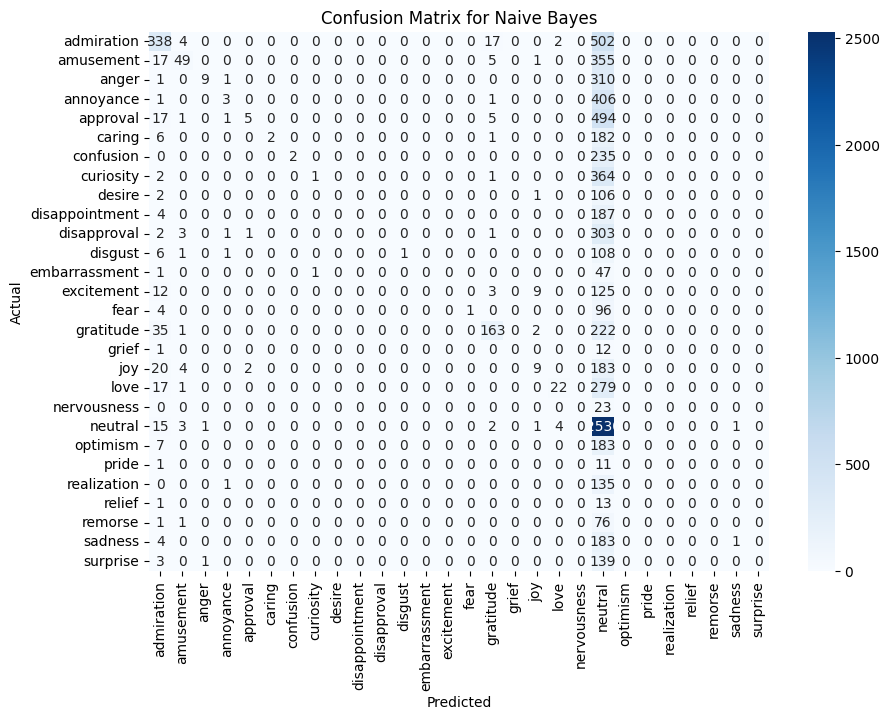

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


In [22]:
import pandas as pd
import numpy as np
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset("go_emotions")

emotion_labels = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 
                  'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 
                  'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 
                  'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 
                  'neutral']

df = pd.DataFrame(dataset['train'])

df['emotion'] = df['labels'].apply(lambda x: emotion_labels[x[0]])

X = df['text']
y = df['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

def predict_emotion(text):
    processed_text = tfidf.transform([text])
    emotion_prediction = model.predict(processed_text)
    return emotion_prediction[0]

while True:
    user_input = input("enter a sentence: ")
    
    if user_input.lower() == 'quit':
        break
    
    predicted_emotion = predict_emotion(user_input)
    print(f"predicted emotion: {predicted_emotion}")


C:\Users\whysu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\whysu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\whysu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Accuracy: 36.12%
                precision    recall  f1-score   support

    admiration       0.65      0.39      0.49       863
     amusement       0.72      0.11      0.20       427
         anger       0.82      0.03      0.05       321
     annoyance       0.38      0.01      0.01       411
      approval       0.62      0.01      0.02       523
        caring       1.00      0.01      0.02       191
     confusion       1.00      0.01      0.02       237
     curiosity       0.50      0.00      0.01       368
        desire       0.00      0.00      0.00       109
disappointment       0.00      0.00      0.00       191
   disapproval       0.00      0.00      0.00       311
       disgust       1.00      0.01      0.02       117
 embarrassment       0.00      0.00      0.00        49
    excitement       0.00      0.00      0.00       149
          fear       1.00      0.01      0.02       101
     gratitude       0.82      0.39      0.52       423
         grief       0.00     

enter a sentence:  i love you


predicted emotion: love


enter a sentence:  i hate you


predicted emotion: anger


enter a sentence:  i am excited!


predicted emotion: excitement


enter a sentence:  i feel sad


predicted emotion: sadness


enter a sentence:  i dont feel too well


predicted emotion: neutral


enter a sentence:  i feel sad


predicted emotion: sadness


enter a sentence:  i like you


predicted emotion: neutral


enter a sentence:  i feel great!


predicted emotion: admiration


KeyboardInterrupt: Interrupted by user

Accuracy: 36.12%
                precision    recall  f1-score   support

    admiration       0.65      0.39      0.49       863
     amusement       0.72      0.11      0.20       427
         anger       0.82      0.03      0.05       321
     annoyance       0.38      0.01      0.01       411
      approval       0.62      0.01      0.02       523
        caring       1.00      0.01      0.02       191
     confusion       1.00      0.01      0.02       237
     curiosity       0.50      0.00      0.01       368
        desire       0.00      0.00      0.00       109
disappointment       0.00      0.00      0.00       191
   disapproval       0.00      0.00      0.00       311
       disgust       1.00      0.01      0.02       117
 embarrassment       0.00      0.00      0.00        49
    excitement       0.00      0.00      0.00       149
          fear       1.00      0.01      0.02       101
     gratitude       0.82      0.39      0.52       423
         grief       0.00     

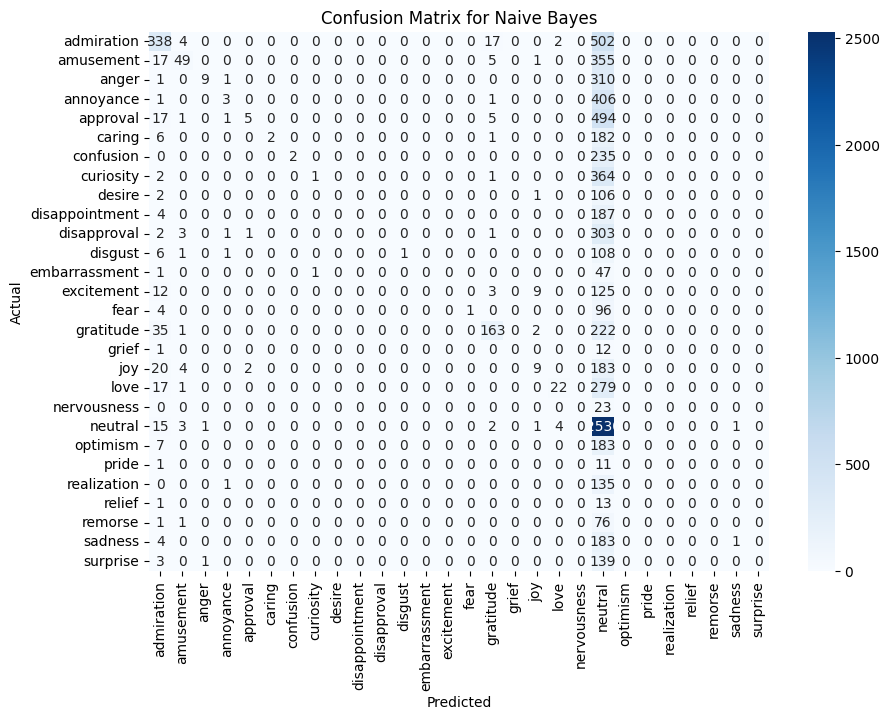

enter a sentence:  i dont feel too good


predicted emotion: neutral


enter a sentence:  i feel bad


predicted emotion: neutral


enter a sentence:  i am happy


predicted emotion: joy


enter a sentence:  i am sad


predicted emotion: sadness


enter a sentence:  i love you


predicted emotion: love


enter a sentence:  i hate you


predicted emotion: anger


enter a sentence:  i feel great!


predicted emotion: admiration


In [ ]:
import pandas as pd
import numpy as np
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset("go_emotions")

emotion_labels = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 
                  'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 
                  'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 
                  'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 
                  'neutral']

df = pd.DataFrame(dataset['train'])

df['emotion'] = df['labels'].apply(lambda x: emotion_labels[x[0]])

X = df['text']
y = df['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

def predict_emotion(text):
    processed_text = tfidf.transform([text])
    emotion_prediction = model.predict(processed_text)
    return emotion_prediction[0]

while True:
    user_input = input("enter a sentence: ")
    
    if user_input.lower() == 'quit':
        break
    
    predicted_emotion = predict_emotion(user_input)
    print(f"predicted emotion: {predicted_emotion}")